<a href="https://colab.research.google.com/github/Mario-RJunior/relacoes-publicas-clientes-NLP/blob/main/relacoes_publicas_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de Relações Públicas

## Importação das bibliotecas e da base de dados

Base de dados: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carregando a base de dados
link = 'https://raw.githubusercontent.com/Mario-RJunior/relacoes-publicas-clientes-NLP/main/amazon_alexa.tsv'
reviews_df = pd.read_csv(link, sep='\t')

In [3]:
reviews_df.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [4]:
# Checando número de linhas e de colunas
reviews_df.shape

(3150, 5)

In [5]:
# Visualizando alguns informaçoes
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [6]:
# Visualizando alguams estatísticas
reviews_df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [7]:
# Visualizando as colunas com os textos
reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

## Exploração dos dados

Iremos nesta seção gerar alguns gráficos para nos ajudar a ter uma melhor compreensão da base de dados.

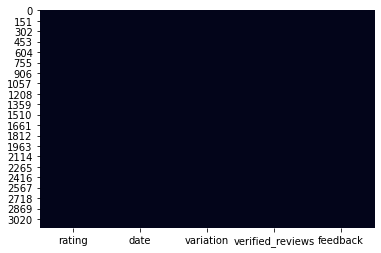

In [8]:
# Verificando valores faltantes com heatmap
sns.heatmap(data=reviews_df.isnull(), cbar=False);

In [9]:
reviews_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

Como visto, confirmamos que não há valores nulos.

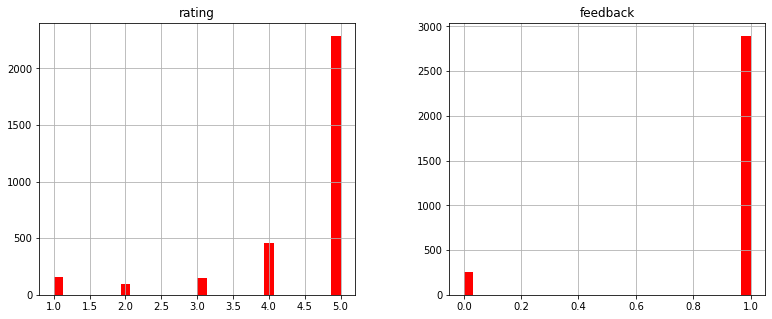

In [10]:
# Histogramas
reviews_df.hist(bins=30, figsize=(13,5), color='r');

Vemos que a maioria das notas (rating) é igual a 5, o que indica que a grande maioria das pessoas gostou dos produtos. Da mesma forma, a maior parte dos feedbacks foram positivos.

In [11]:
# Número de caracteres para coluna "verified_reviews"
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


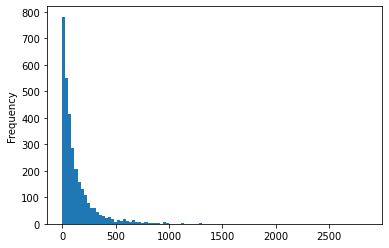

In [12]:
# Histograma para a quantidade de caracteres
reviews_df['length'].plot(kind='hist', bins=100);

Notamos que a maioria dos reviews tem cerca de 100 ou 200 caracteres.

In [13]:
# Estatísticas para coluna "length"
reviews_df['length'].describe()

count    3150.000000
mean      132.049524
std       182.099952
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [14]:
# Checando um dos  valores mínimo
reviews_df.query('length == 1')['verified_reviews'].iloc[0]

'😍'

In [15]:
# Checando o review máximo
reviews_df.query('length == 2851')['verified_reviews'].iloc[0]

"Incredible piece of technology.I have this right center of my living room on an island kitchen counter. The mic and speaker goes in every direction and the quality of the sound is quite good. I connected the Echo via Bluetooth to my Sony soundbar on my TV but find the Echo placement and 360 sound more appealing. It's no audiophile equipment but there is good range and decent bass. The sound is more than adequate for any indoor entertaining and loud enough to bother neighbors in my building. The knob on the top works great for adjusting volume. This is my first Echo device and I would imagine having to press volume buttons (on the Echo 2) a large inconvenience and not as precise. For that alone I would recommend this over the regular Echo (2nd generation).The piece looks quality and is quite sturdy with some weight on it. The rubber material on the bottom has a good grip on the granite counter-- my cat can even rub her scent on it without tipping it over.This order came with a free Phi

In [16]:
# Verificando um review com tamanho médio
reviews_df.query('length == 132')['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

Podemos agora criar dataframes com os reviews positivos e negativos baseados na coluna "feedback".

In [17]:
# Reviews positivos
positive = reviews_df.query('feedback == 1')
positive.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [18]:
positive.describe()

,rating,feedback,length
count,2893.000000,2893.0,2893.000000
mean,4.737643,1.0,124.659177
std,0.546544,0.0,174.624491
min,3.000000,1.0,1.000000
25%,5.000000,1.0,29.000000
50%,5.000000,1.0,69.000000
75%,5.000000,1.0,154.000000
max,5.000000,1.0,2851.000000


In [19]:
# Reviews negativos
negative = reviews_df.query('feedback == 0')
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [20]:
negative.describe()

,rating,feedback,length
count,257.000000,257.0,257.000000
mean,1.373541,0.0,215.241245
std,0.484688,0.0,236.325955
min,1.000000,0.0,1.000000
25%,1.000000,0.0,53.000000
50%,1.000000,0.0,137.000000
75%,2.000000,0.0,289.000000
max,2.000000,0.0,1686.000000


Comparando as estatísticas dos dois casos vemos que as pessoas satisfeitas com os produtos escrevem textos com, em média, 124 caracteres, enquanto que as pessoas que não estão tão satisfeitas escrevem, em média, com 215 caracteres.

Isso pode indicar que as pessoa que não estão satisfeitas tendem a explicar o motivo de sua insatisfação de forma detalhada, citar os problemas encontrados, etc.

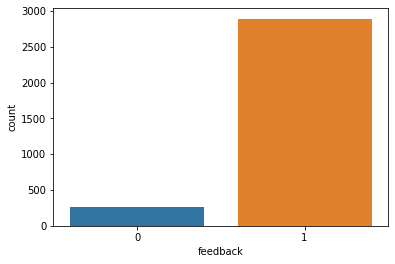

In [21]:
# Contagem de pessoas satisfeitas ou não
sns.countplot(data=reviews_df, x='feedback');

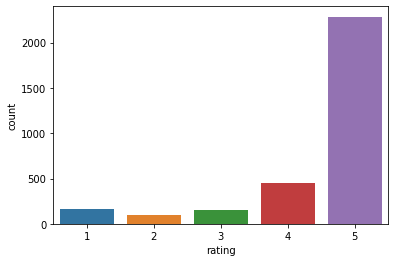

In [22]:
# Contagem dos ratings
sns.countplot(data=reviews_df, x='rating');

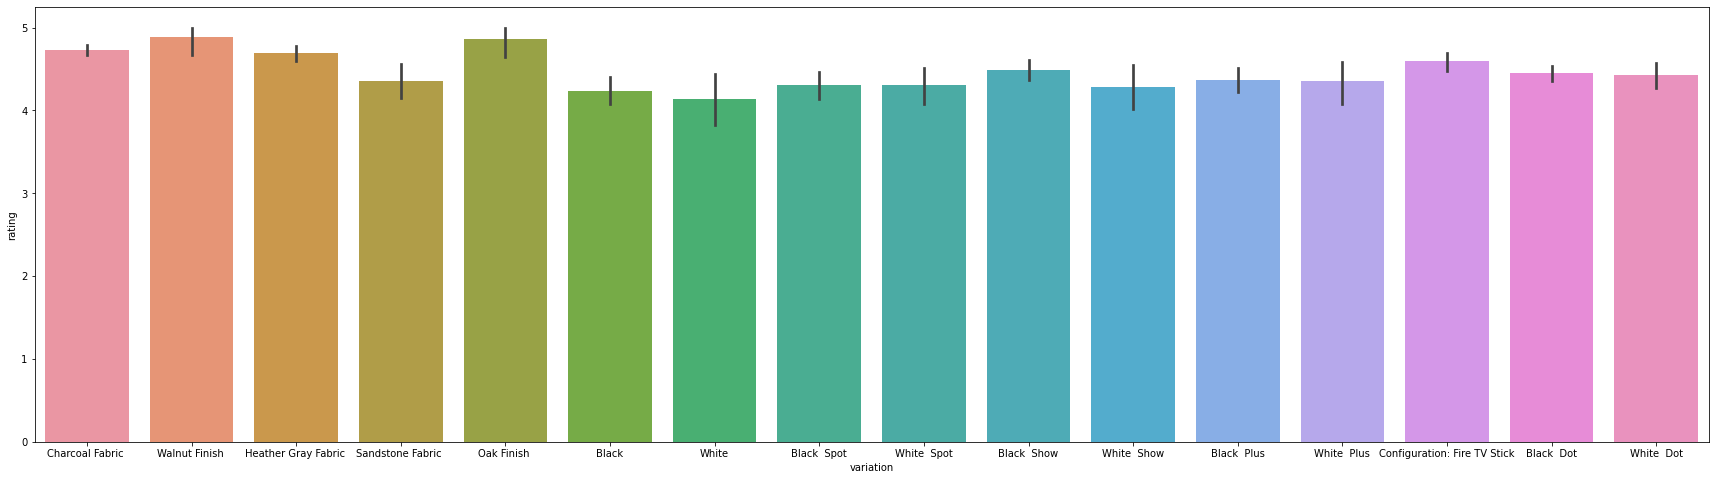

In [23]:
# Verificando as variações dos produtos
plt.figure(figsize=(30,8))
sns.barplot(data=reviews_df, x='variation', y='rating');

Note que as notas são bem parecidas, o que indica que as variações dos produtos não fazem tanta diferença assim. Por exemplo, um *pen drive* de 2 Gb provavelmente recebeu a mesma nota de um *pen drive* similar mas de 8 Gb.

### Nuvem de palavas

Iremos agora gerar uma nuvem de palavras, que consiste em descobrir as palavras mais frequentemente usadas nos reviews. Isto é importante pois pode nos dá um indício das coisas que são mais comentadas sobre os produtos e sobre o serviço.

In [24]:
# Criando uma lista dos reviews
sentences = reviews_df['verified_reviews'].tolist()
len(sentences)

3150

In [25]:
# Visualizando os 5 primeiros comentários
sentences[0:5]

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music']

Um importante passo para geração da nuvem de palavras é deixar todos os comentários em uma string só. Segue então o respectivo código.

In [26]:
# Juntando as sentenças em uma única string
sentences_as_one_string = ' '.join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [27]:
# Verificando o número de caracteres
len(sentences_as_one_string)

419105

Gerando agora a nuvem de palavras.

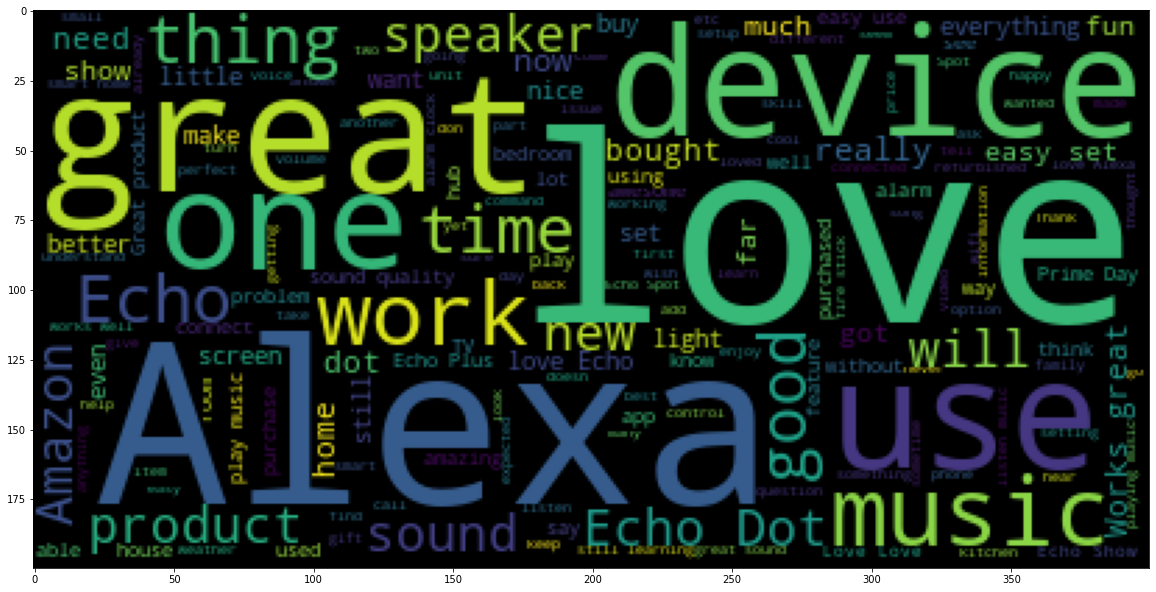

In [28]:
# Importanto a biblioteca
from wordcloud import WordCloud

# Gerando a imagem
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string));

Uma outra etapa que pode ser feita é a geração de uma outra nuvem de palavras considerando apenas os reviews negativos. Para isso, usaremos o dataframe negative, criado anteriormente.

In [29]:
# Criando uma lista com reviews negativos
negative_list = negative['verified_reviews'].tolist()

# Mostrando os 5 primeiros reviews
negative_list[0:5]

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.']

In [30]:
# Juntando em uma unica string
negative_sentences_as_one_string = ' '.join(negative_list)
negative_sentences_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

In [31]:
# Verificando o número de caracteres
len(negative_sentences_as_one_string)

55573

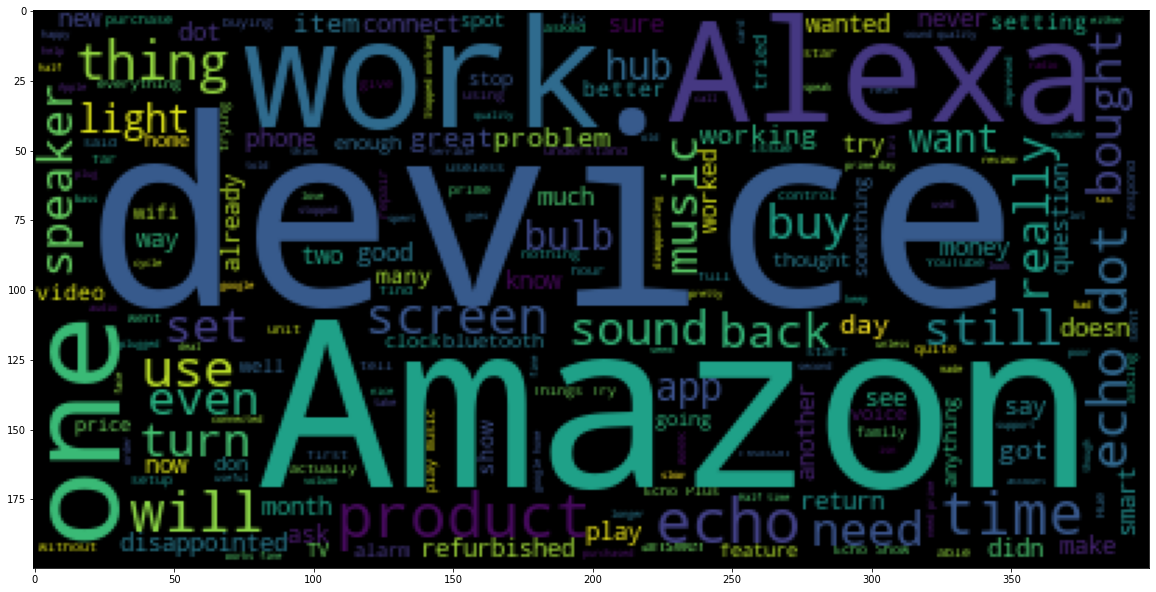

In [32]:
# Gerando a nuvem de palavras
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string));

## Limpeza de dados

Nesta seção iremos fazer alguns processamentos, analisando alguns atributos da base de dados para exclusão de alguns deles. Para isso, inicialmente iremos converter os valores do atributo "variation" para números, transformando-os em variáveis dummy.

In [33]:
# Visualizando os atributos
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [34]:
# Verificando os valores únicos
reviews_df['variation'].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [35]:
# Criando novo dataframe com apenas o atributo "variation"
reviews_variation_df = reviews_df['variation']
reviews_variation_df = pd.DataFrame(reviews_variation_df)

# Visualizando o cabeçalho do novo dataframe
reviews_variation_df.head()

,variation
0,Charcoal Fabric
1,Charcoal Fabric
2,Walnut Finish
3,Charcoal Fabric
4,Charcoal Fabric


Criando as variáveis dummy com o OneHotEncoder.

In [36]:
# Importando a biblioteca
from sklearn.preprocessing import OneHotEncoder 

# Criando o encoder
onehotencoder = OneHotEncoder()

# Fazendo a transformação dos dados
reviews_variation_df = onehotencoder.fit_transform(reviews_variation_df).toarray()

# Visualizando o array gerado na posição 0
reviews_variation_df[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
# Verificando o shape
reviews_variation_df.shape

(3150, 16)

In [38]:
# Verificando o tipo de variável
print(type(reviews_variation_df))

<class 'numpy.ndarray'>


Devemos converter este último resultado de array para dataframe para que possamos concatená-lo com o dataframe principal.

In [39]:
# Convertendo de array para dataframe
reviews_variation_df = pd.DataFrame(reviews_variation_df)

print(type(reviews_variation_df))

<class 'pandas.core.frame.DataFrame'>


In [40]:
# Concatenando este dataframe com o original
reviews_df = pd.concat([reviews_df, reviews_variation_df], axis=1)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,31-Jul-18,Charcoal Fabric,Music,1,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Como queremos analisar apenas a coluna "verified_reviews", iremos deletar os atributos "rating", "date", "length" e o próprio "variation", uma vez que já temos as informações deste atributo em forma de variáveis dummy.

In [41]:
# Deletando as colunas
reviews_df = reviews_df.drop(columns=['date', 'rating', 'variation', 'length'], 
                             axis=1)
reviews_df.head()

,verified_reviews,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Love my Echo!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Loved it!,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Sometimes while playing a game, you can answer...",1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,I have had a lot of fun with this thing. My 4 ...,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Music,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Verificando o shape
reviews_df.shape

(3150, 18)

## Remoção de pontuação dos textos

Antes de utilizarmos técnicas de Machine Learning no dataframe acima precisamos fazer mais um pré-processamento na coluna "verified_reviews", que consiste na remoção das pontuações dos textos.

In [43]:
# Importanto a biblioteca
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
# Criando uma variável de teste com review qualquer
test = reviews_df['verified_reviews'][300]
test

'Just getting use to using the Echo. Used it for shopping lists, listening to music and as a timer. Working great so far.'

In [45]:
test_punc_removed = [char for char in test if char not in string.punctuation]

In [46]:
print(test_punc_removed)

['J', 'u', 's', 't', ' ', 'g', 'e', 't', 't', 'i', 'n', 'g', ' ', 'u', 's', 'e', ' ', 't', 'o', ' ', 'u', 's', 'i', 'n', 'g', ' ', 't', 'h', 'e', ' ', 'E', 'c', 'h', 'o', ' ', 'U', 's', 'e', 'd', ' ', 'i', 't', ' ', 'f', 'o', 'r', ' ', 's', 'h', 'o', 'p', 'p', 'i', 'n', 'g', ' ', 'l', 'i', 's', 't', 's', ' ', 'l', 'i', 's', 't', 'e', 'n', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'm', 'u', 's', 'i', 'c', ' ', 'a', 'n', 'd', ' ', 'a', 's', ' ', 'a', ' ', 't', 'i', 'm', 'e', 'r', ' ', 'W', 'o', 'r', 'k', 'i', 'n', 'g', ' ', 'g', 'r', 'e', 'a', 't', ' ', 's', 'o', ' ', 'f', 'a', 'r']


Note que a lista acima não possui a pontuação da frase original. Podemos agora juntar esta frase novamente em uma string apenas sem a pontuação.

In [47]:
# Juntando novamente em string
test_punc_removed = ''.join(test_punc_removed)
test_punc_removed

'Just getting use to using the Echo Used it for shopping lists listening to music and as a timer Working great so far'

## Remoção de stop words

Inicialmente, podemos difinir "stop words" como sendo aquelas palavras que não dão um sentido ao texto, podendo assim ser consideradas como ruídos. 

Tendo em vista que queremos fazer uma análise no sentimento por trás de cada comentário, algumas palavras, como por exemplo, "eu", "você", "nosso", "suas", etc. simplesmente não irão contribuir para o sentido do review e serão tratadas como ruídos em nossa análise. Estas palavras são as stop words e precisam ser removidas do texto.

Assim, precisamos importar as bibliotecas que farão este trabalho.

In [48]:
# Importando a biblioteca
import nltk

In [49]:
# Fazendo download de alguns pacotes
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [51]:
# Fazendo uma contagem das stop words
len(stopwords.words('english'))

179

Podemos remover as stop words da variável de testes gerada acima.

In [52]:
# Vendo novamente a variável
test_punc_removed

'Just getting use to using the Echo Used it for shopping lists listening to music and as a timer Working great so far'

In [53]:
# Removendo stop words da variável de teste
test_punc_stop_removed = [word for word in test_punc_removed.split() if word.lower() not in stopwords.words('english')]

In [54]:
# Verificando a nova variável
test_punc_stop_removed

['getting',
 'use',
 'using',
 'Echo',
 'Used',
 'shopping',
 'lists',
 'listening',
 'music',
 'timer',
 'Working',
 'great',
 'far']

Comparando com a frase original, notamos que não temos mais as stop words.

## Count vectorization (tokenização)

Nesta seção iremos converter as palavras de cada frase em números e fazer uma contagem de quantas vezes elas aparecem a cada frase. O objetivo é gerar uma matriz onde cada linha representa uma frase e cada coluna uma palavra, contendo a quantidade de vezes que cada uma delas aparece.

Segue abaixo um exemplo do que desejamos fazer.

In [55]:
# Importando a biblioteca
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
# Exemplo de count vectorization
sample_data = ['This is the first document.', 
               'This document is the second document.',
               'And this is the third one.',
               'Is this the first document?']

In [57]:
# Fazendo a tokenização
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [58]:
# Imprimindo os valores únicos
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [59]:
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [60]:
# Visualizando a matriz
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## Pipeline para limpeza dos textos

A partir de agora podemos juntar todos os conceitos vistos acima para limpar os textos da coluna "verified_reviews" do dataframe.

In [61]:
# Criando a função
def message_cleaning(message):
  text = [char for char in message if char not in string.punctuation]
  text = ''.join(text) # Colocando no formato de string
  text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
  return text

In [62]:
# Aplicando a função no dataframe
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

In [63]:
# Confirmando o resultado
print(reviews_df_clean[3])
print()
print(reviews_df['verified_reviews'][3])

['lot', 'fun', 'thing', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'nice', 'sound', 'playing', 'music', 'well']

I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.


Comparando o resultado acima vemos que de fato foram removidas as pontuações e as stop words.

In [64]:
# Visualizando o dataframe
reviews_df_clean

0                                            [Love, Echo]
1                                                 [Loved]
2       [Sometimes, playing, game, answer, question, c...
3       [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                                 [Music]
                              ...                        
3145                    [Perfect, kids, adults, everyone]
3146    [Listening, music, searching, locations, check...
3147    [love, things, running, entire, home, TV, ligh...
3148    [complaint, sound, quality, isnt, great, mostl...
3149                                               [Good]
Name: verified_reviews, Length: 3150, dtype: object

In [65]:
# Fazendo a vectorização
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [66]:
# Vendo as palavras únicas
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [67]:
# Contagem de palavras únicas
len(vectorizer.get_feature_names())

5211

In [68]:
# Visualizando shape
reviews_countvectorizer.shape

(3150, 5211)

Precisamos juntar a matriz obtida no nosso dataframe original. Mas antes, devemos deletar a coluna "verified_reviews" para que ela não fique repetida no dataframe.


In [69]:
# Apagando a coluna "verified_reviews"
reviews_df.drop(['verified_reviews'], axis=1, inplace=True)

# Checando a deleção da coluna
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [70]:
# Verificando o tipo da matriz
type(reviews_countvectorizer)

scipy.sparse.csr.csr_matrix

In [71]:
# Convertendo para um dataframe do pandas
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

# Verificando o formato
type(reviews)

pandas.core.frame.DataFrame

In [72]:
# Fazendo a junção dos dataframes
reviews_df = pd.concat([reviews_df, reviews], axis=1)

In [73]:
# Checkando o dataframe
reviews_df

,feedback,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,...,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Por fim, dividiremos o dataframe em 2 partes: X contando as variáveis previsoras e y a classe (o que queremos prever).

In [74]:
# Dividindo a base de dados
X = reviews_df.drop(['feedback'], axis=1)
y = reviews_df['feedback']

In [75]:
# Visualizando o dataframe X
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
# Visualizando a série y
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

## Treinamento e avaliação do Naive Bayes

Agora sim faremos a implementação do algorítmo Naive Bayes para criação do modelo de classificação. Para isso, devemos separar a base entre treino e testes e depois fazer o respectivo treinamento.

In [77]:
# Importando a bibliotecas
from sklearn.model_selection import train_test_split

# Fazendo a divisão da base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [78]:
# Verificando o shape
X_train.shape, X_test.shape

((2520, 5227), (630, 5227))

In [79]:
# Importando o Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [80]:
# Fazendo o treinamento
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Fazendo a avaliação do modelo.

In [81]:
# Importando as bibliotecas
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [82]:
# Fazendo as previsões
y_pred = naive_bayes.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
# Vrificando o "gabarito"
y_test

422     1
1581    1
1185    1
683     1
305     1
       ..
1276    1
3099    1
841     1
44      1
615     1
Name: feedback, Length: 630, dtype: int64

In [84]:
# Visualizando o score
accuracy_score(y_test, y_pred)

0.9396825396825397

In [85]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 25,  29],
       [  9, 567]])

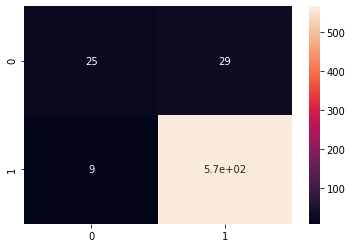

In [86]:
# Visualizando matriz de confusão com heatmap
sns.heatmap(cm, annot=True);

In [87]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57        54
           1       0.95      0.98      0.97       576

    accuracy                           0.94       630
   macro avg       0.84      0.72      0.77       630
weighted avg       0.93      0.94      0.93       630



## Treinamento e avaliação da regressão logística

Iremos agora repetir o processo acima mas criando um modelo com um algorítmo de regressão logística.

In [88]:
# Importando a biblioteca
from sklearn.linear_model import LogisticRegression

In [89]:
# Fazendo o treinamento
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
# Fazendo as previsoes
y_pred = logistic.predict(X_test)

In [91]:
# Verificando o score
accuracy_score(y_test, y_pred)

0.9428571428571428

In [92]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.46      0.58        54
           1       0.95      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.87      0.73      0.78       630
weighted avg       0.94      0.94      0.94       630



## Classificação de somente uma frase

Nesta etapa final simularemos que nosso modelo já está em fase de produção e queremos classificar apenas uma frase. Para isso, precisamos salvar o modelo e depois carregá-lo para utilização.

In [93]:
# Import da biblioteca para salvar o melhor modelo
import pickle

In [94]:
# Salvando o modelo
with open('text_classifier.pkl', 'wb') as f:
  pickle.dump([logistic, onehotencoder, vectorizer], f)

Agora iremos carregar arquivo recém gerado para utilizá-lo.

In [96]:
with open('text_classifier.pkl', 'rb') as f:
  log, onehot, vec = pickle.load(f)

Verificando se os dados estão em memória.

In [97]:
log

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
onehot

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [99]:
vec

CountVectorizer(analyzer=<function message_cleaning at 0x7f1e4e0f5048>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Fazendo um teste passando um texto negativo:

In [100]:
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


In [101]:
# Pegando uma frase para teste
negative_text = negative.iloc[0:1, [2,3]]
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [102]:
X_cat = negative_text[['variation']]
X_cat

,variation
46,Charcoal Fabric


In [103]:
# Transformando o texto
X_cat = onehot.transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
negative_text

,variation,verified_reviews
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc..."


In [106]:
# Igualando os índices
X_cat.index = negative_text.index

In [107]:
# Criando novo dataframe para concatenação
negative_df = pd.concat([negative_text, X_cat], axis=1)
negative_df

,variation,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# Deletando a coluna "variation"
negative_df.drop(['variation'], axis=1, inplace=True)
negative_df

,verified_reviews,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,"It's like Siri, in fact, Siri answers more acc...",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
# Vetorizando
negative_countvectorizer = vec.transform(negative_df['verified_reviews'])

In [110]:
negative_countvectorizer

<1x5211 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [112]:
# Gerando dataframe para "negative_countvectorizer"
review = pd.DataFrame(negative_countvectorizer.toarray())
review

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
# Deletando a coluna "verified_reviews"
negative_df.drop(['verified_reviews'], axis=1, inplace=True)
negative_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
46,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Iremos concatenar os dataframes novamente. Mas antes, iremos igualar os índices.

In [113]:
# Igualando os índices
negative_df.index = review.index

# Concatenando os dataframes
negative_final = pd.concat([negative_df, review], axis=1)
negative_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,...,5171,5172,5173,5174,5175,5176,5177,5178,5179,5180,5181,5182,5183,5184,5185,5186,5187,5188,5189,5190,5191,5192,5193,5194,5195,5196,5197,5198,5199,5200,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Fazendo finalmente a previsão.

In [114]:
log.predict(negative_final)

array([0])

Vemos que ele acertou a previsão! 

Verificando agora a probabilidade.

In [115]:
# Probabilidade
log.predict_proba(negative_final)

array([[0.7950749, 0.2049251]])

Vemos então que ele tem 79% de certeza que trata-se de um review negativo!